## McMC by MH for mean of a Gaussian distribution

1. Use the Metropolis-Hasting algorithm to compute the posterior distribution of the mean of a Gaussian distribution with known variance, from a sequence of given observations. 
2. Study the influence of the proposal distribution on the convergence of the Markov Chain generated in the first part. 

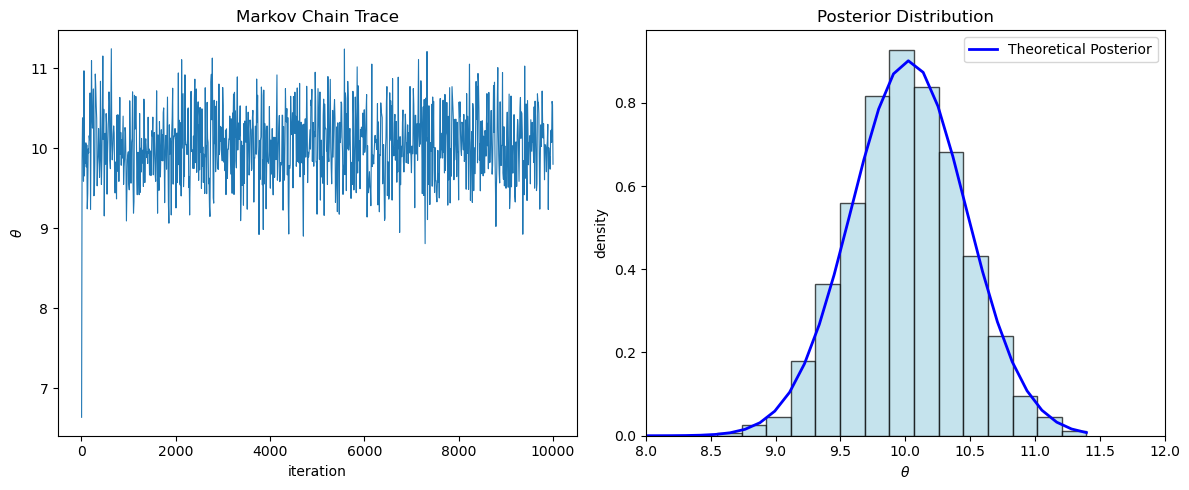

Sample posterior mean: 10.0120
Theoretical posterior mean: 10.0275
Sample posterior std: 0.4272
Theoretical posterior std: 0.4428


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

##### ---- Parameters and data
sig2 = 1          # likelihood variance
tau2 = 10         # Gaussian prior variance
mu = 5            # Gaussian prior mean
theta = 0         # initial value
delta = 2         # Gaussian proposal variance
N = 10000         # length of chain

# observations
y = np.array([9.37, 10.18, 9.16, 11.60, 10.33])

# initialize
THETA = []
np.random.seed(1956)

#### ---- Metropolis algorithm
for n in range(N):
    # candidate
    theta_star = np.random.normal(theta, np.sqrt(delta))
    
    # log acceptance ratio
    log_r = (np.sum(stats.norm.logpdf(y, theta_star, np.sqrt(sig2))) +
             stats.norm.logpdf(theta_star, mu, np.sqrt(tau2))) - \
            (np.sum(stats.norm.logpdf(y, theta, np.sqrt(sig2))) +
             stats.norm.logpdf(theta, mu, np.sqrt(tau2)))
    
    # acceptance test
    if np.log(np.random.uniform()) < log_r:
        theta = theta_star
    
    THETA.append(theta)  # update chain

# Convert to numpy array for easier indexing
THETA = np.array(THETA)

##### ---- Output
# compute theoretical sample posterior
n = 5
mu_n = (np.mean(y) * n / sig2 + mu / tau2) / (n / sig2 + 1 / tau2)
tau2_n = 1 / (n / sig2 + 1 / tau2)

# set up plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# plot Markov Chain
Nkeep = np.arange(9, N, 10)  # Python uses 0-based indexing, so 9 corresponds to R's 10
ax1.plot(Nkeep + 1, THETA[Nkeep], linewidth=0.8)  # +1 to match R's 1-based iteration labels
ax1.set_xlabel('iteration')
ax1.set_ylabel(r'$\theta$')
ax1.set_title('Markov Chain Trace')

# plot histogram of posterior distribution (burn-in: first 50 samples)
ax2.hist(THETA[50:], bins=15, density=True, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel('density')
ax2.set_title('Posterior Distribution')

# overlay theoretical posterior density
th = np.linspace(THETA.min(), THETA.max(), 100)
theoretical_density = stats.norm.pdf(th, mu_n, np.sqrt(tau2_n))
ax2.plot(th, theoretical_density, 'blue', linewidth=2, label='Theoretical Posterior')
ax2.legend()
ax2.set_xlim([8, 12])

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Sample posterior mean: {np.mean(THETA[50:]):.4f}")
print(f"Theoretical posterior mean: {mu_n:.4f}")
print(f"Sample posterior std: {np.std(THETA[50:]):.4f}")
print(f"Theoretical posterior std: {np.sqrt(tau2_n):.4f}")

### Conclusions

1. The chain converges very rapidly from the very approximate initial value, $\theta^{(0)} = 5,$  and the burn-in period is very short.
2. The sampled posterior computed by the MH algorithm gives an excellent approximation to the exact expression, $p(\theta \mid y) \sim \mathcal{N}(\mu_n,\tau_n^2) = \mathcal{N}(10.03,0.196).$